In [1]:
import pandas as pd

df = pd.read_csv('Dev/projects/backend/LSTM/AAPL.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-11,42.299999,43.222500,42.197498,43.167500,41.047955,141095200
1,2017-12-12,43.037498,43.097500,42.865002,42.924999,40.817371,77636800
2,2017-12-13,43.125000,43.384998,43.000000,43.067501,40.952866,95273600
3,2017-12-14,43.099998,43.282501,42.912498,43.055000,40.940983,81906000
4,2017-12-15,43.407501,43.542500,43.115002,43.492500,41.357006,160677200
...,...,...,...,...,...,...,...
1254,2022-12-05,147.770004,150.919998,145.770004,146.630005,146.630005,68826400
1255,2022-12-06,147.070007,147.300003,141.919998,142.910004,142.910004,64727200
1256,2022-12-07,142.190002,143.369995,140.000000,140.940002,140.940002,69721100
1257,2022-12-08,142.360001,143.520004,141.100006,142.649994,142.649994,62128300


In [2]:
df = df[['Date', 'Close']]
df

,Date,Close
0,2017-12-11,43.167500
1,2017-12-12,42.924999
2,2017-12-13,43.067501
3,2017-12-14,43.055000
4,2017-12-15,43.492500
...,...,...
1254,2022-12-05,146.630005
1255,2022-12-06,142.910004
1256,2022-12-07,140.940002
1257,2022-12-08,142.649994


In [3]:
import datetime

def strToDate(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

datetime.datetime(2022, 10, 18, 0, 0)

In [4]:
df['Date'] = df['Date'].apply(strToDate)
df['Date']

/var/folders/0j/t8jvtbb97_jf_k38b6ptvj480000gn/T/ipykernel_32903/3418807745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(strToDate)


0      2017-12-11
1      2017-12-12
2      2017-12-13
3      2017-12-14
4      2017-12-15
          ...    
1254   2022-12-05
1255   2022-12-06
1256   2022-12-07
1257   2022-12-08
1258   2022-12-09
Name: Date, Length: 1259, dtype: datetime64[ns]

In [5]:
df = df.set_index('Date')
df

,Close
Date,
2017-12-11,43.167500
2017-12-12,42.924999
2017-12-13,43.067501
2017-12-14,43.055000
2017-12-15,43.492500
...,...
2022-12-05,146.630005
2022-12-06,142.910004
2022-12-07,140.940002


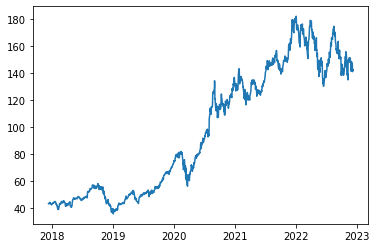

In [6]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [7]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n):
  first_date = strToDate(first_date_str)
  last_date  = strToDate(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2020-12-19', 
                                '2022-12-09', 
                                n=5)
windowed_df

,Target Date,Target-5,Target-4,Target-3,Target-2,Target-1,Target
0,2020-12-19,122.410004,121.779999,127.879997,127.809998,128.699997,126.660004
1,2020-12-22,127.879997,127.809998,128.699997,126.660004,128.229996,131.880005
2,2020-12-23,127.809998,128.699997,126.660004,128.229996,131.880005,130.960007
3,2020-12-24,128.699997,126.660004,128.229996,131.880005,130.960007,131.970001
4,2020-12-28,126.660004,128.229996,131.880005,130.960007,131.970001,136.690002
...,...,...,...,...,...,...,...
492,2022-12-05,144.220001,141.169998,148.029999,148.309998,147.809998,146.630005
493,2022-12-06,141.169998,148.029999,148.309998,147.809998,146.630005,142.910004
494,2022-12-07,148.029999,148.309998,147.809998,146.630005,142.910004,140.940002
495,2022-12-08,148.309998,147.809998,146.630005,142.910004,140.940002,142.649994


In [38]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((497,), (497, 5, 1), (497,))

array([Timestamp('2022-09-30 00:00:00'), Timestamp('2022-10-03 00:00:00'),
       Timestamp('2022-10-04 00:00:00'), Timestamp('2022-10-05 00:00:00'),
       Timestamp('2022-10-06 00:00:00'), Timestamp('2022-10-07 00:00:00'),
       Timestamp('2022-10-10 00:00:00'), Timestamp('2022-10-11 00:00:00'),
       Timestamp('2022-10-12 00:00:00'), Timestamp('2022-10-13 00:00:00'),
       Timestamp('2022-10-14 00:00:00'), Timestamp('2022-10-17 00:00:00'),
       Timestamp('2022-10-18 00:00:00'), Timestamp('2022-10-19 00:00:00'),
       Timestamp('2022-10-20 00:00:00'), Timestamp('2022-10-21 00:00:00'),
       Timestamp('2022-10-24 00:00:00'), Timestamp('2022-10-25 00:00:00'),
       Timestamp('2022-10-26 00:00:00'), Timestamp('2022-10-27 00:00:00'),
       Timestamp('2022-10-28 00:00:00'), Timestamp('2022-10-31 00:00:00'),
       Timestamp('2022-11-01 00:00:00'), Timestamp('2022-11-02 00:00:00'),
       Timestamp('2022-11-03 00:00:00'), Timestamp('2022-11-04 00:00:00'),
       Timestamp('2022-11

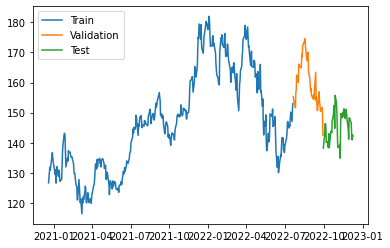

In [39]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])
dates_test

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((5, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
13/13 [==============================] - 3s 39ms/step - loss: 21819.9707 - mean_absolute_error: 146.7964 - val_loss: 25580.4199 - val_mean_absolute_error: 159.7547
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 21677.4316 - mean_absolute_error: 146.3107 - val_loss: 25384.3418 - val_mean_absolute_error: 159.1399
Epoch 3/100
13/13 [==============================] - 0s 6ms/step - loss: 21436.0703 - mean_absolute_error: 145.4823 - val_loss: 25003.7129 - val_mean_absolute_error: 157.9393
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 20875.0449 - mean_absolute_error: 143.5390 - val_loss: 23969.3691 - val_mean_absolute_error: 154.6299
Epoch 5/100
13/13 [==============================] - 0s 7ms/step - loss: 19451.5996 - mean_absolute_error: 138.4785 - val_loss: 21574.6191 - val_mean_absolute_error: 146.6813
Epoch 6/100
13/13 [==============================] - 0s 9ms/step - loss: 16366.7334 - mean_absolute_error: 126.7671 - val_lo

13/13 [==============================] - 0s 2ms/step


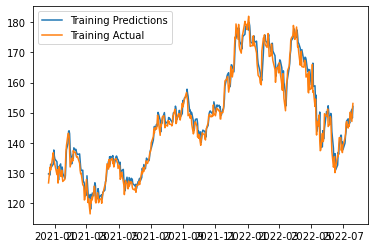

In [41]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions','Training Actual'])

2/2 [==============================] - 0s 3ms/step


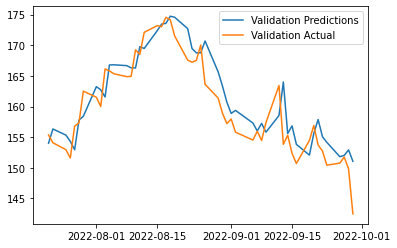

In [42]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Actual'])

2/2 [==============================] - 0s 3ms/step


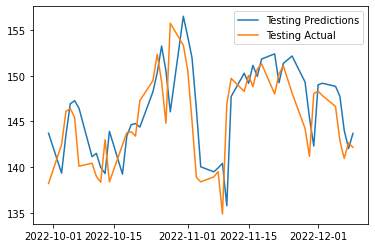

In [43]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Actual'])

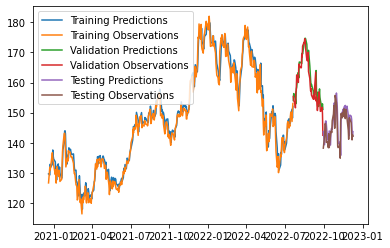

In [52]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [60]:
x_input=df.to_numpy()[1159:].reshape(1, -1)
x_input

array([[155.350006, 154.089996, 152.949997, 151.600006, 156.789993,
        157.350006, 162.509995, 161.509995, 160.009995, 166.130005,
        165.809998, 165.350006, 164.869995, 164.919998, 169.240005,
        168.490005, 172.100006, 173.190002, 173.029999, 174.550003,
        174.149994, 171.520004, 167.570007, 167.229996, 167.529999,
        170.029999, 163.619995, 161.380005, 158.910004, 157.220001,
        157.960007, 155.809998, 154.529999, 155.960007, 154.460007,
        157.369995, 163.429993, 153.839996, 155.309998, 152.369995,
        150.699997, 154.479996, 156.899994, 153.720001, 152.740005,
        150.429993, 150.770004, 151.759995, 149.839996, 142.479996,
        138.199997, 142.449997, 146.100006, 146.399994, 145.429993,
        140.089996, 140.419998, 138.979996, 138.339996, 142.990005,
        138.380005, 142.410004, 143.75    , 143.860001, 143.389999,
        147.270004, 149.449997, 152.339996, 149.350006, 144.800003,
        155.740005, 153.339996, 150.649994, 145.

In [61]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[155.350006,
 154.089996,
 152.949997,
 151.600006,
 156.789993,
 157.350006,
 162.509995,
 161.509995,
 160.009995,
 166.130005,
 165.809998,
 165.350006,
 164.869995,
 164.919998,
 169.240005,
 168.490005,
 172.100006,
 173.190002,
 173.029999,
 174.550003,
 174.149994,
 171.520004,
 167.570007,
 167.229996,
 167.529999,
 170.029999,
 163.619995,
 161.380005,
 158.910004,
 157.220001,
 157.960007,
 155.809998,
 154.529999,
 155.960007,
 154.460007,
 157.369995,
 163.429993,
 153.839996,
 155.309998,
 152.369995,
 150.699997,
 154.479996,
 156.899994,
 153.720001,
 152.740005,
 150.429993,
 150.770004,
 151.759995,
 149.839996,
 142.479996,
 138.199997,
 142.449997,
 146.100006,
 146.399994,
 145.429993,
 140.089996,
 140.419998,
 138.979996,
 138.339996,
 142.990005,
 138.380005,
 142.410004,
 143.75,
 143.860001,
 143.389999,
 147.270004,
 149.449997,
 152.339996,
 149.350006,
 144.800003,
 155.740005,
 153.339996,
 150.649994,
 145.029999,
 138.880005,
 138.380005,
 138.919998,
 13

In [62]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)


[139.35065]
101
1 day input [154.089996   152.949997   151.600006   156.789993   157.350006
 162.509995   161.509995   160.009995   166.130005   165.809998
 165.350006   164.869995   164.919998   169.240005   168.490005
 172.100006   173.190002   173.029999   174.550003   174.149994
 171.520004   167.570007   167.229996   167.529999   170.029999
 163.619995   161.380005   158.910004   157.220001   157.960007
 155.809998   154.529999   155.960007   154.460007   157.369995
 163.429993   153.839996   155.309998   152.369995   150.699997
 154.479996   156.899994   153.720001   152.740005   150.429993
 150.770004   151.759995   149.839996   142.479996   138.199997
 142.449997   146.100006   146.399994   145.429993   140.089996
 140.419998   138.979996   138.339996   142.990005   138.380005
 142.410004   143.75       143.860001   143.389999   147.270004
 149.449997   152.339996   149.350006   144.800003   155.740005
 153.339996   150.649994   145.029999   138.880005   138.380005
 138.919998 

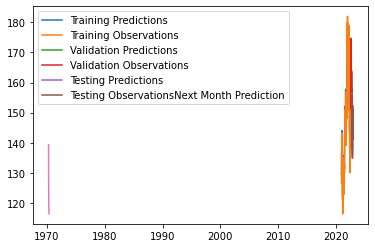

In [85]:
from sklearn.preprocessing import MinMaxScaler

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(day_pred,(lst_output))
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'
            'Next Month Prediction'])

